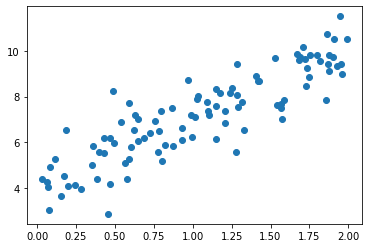

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

plt.scatter(x, y)
plt.show()

In [2]:
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.13630859],
       [2.92792479]])

In [3]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.13630859],
       [9.99215817]])

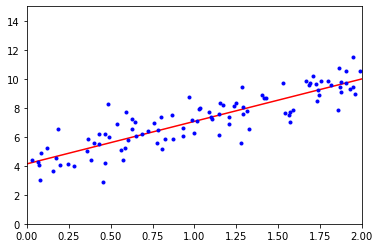

In [4]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13630859]), array([[2.92792479]]))

In [6]:
lin_reg.predict(x_new)

array([[4.13630859],
       [9.99215817]])

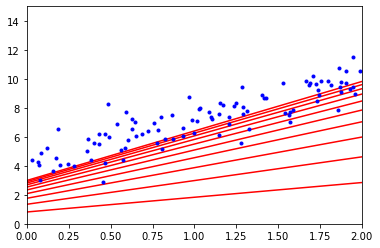

array([[2.99212893],
       [3.41120915]])

In [21]:
eta = 0.05
n_iterations = 10
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    plt.plot(x_new, x_new*theta[1] + theta[0], "r-")

plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
theta

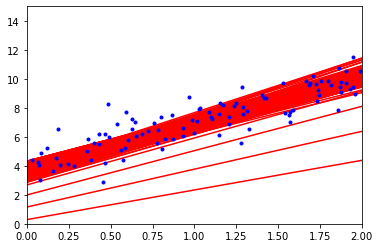

array([[4.10165992],
       [2.91695348]])

In [23]:
n_epochs = 50
t0, t1, = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        plt.plot(x_new, x_new*theta[1] + theta[0], "r-")

plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()
theta

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16786584]), array([2.98584678]))

In [34]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X * 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.1992034])

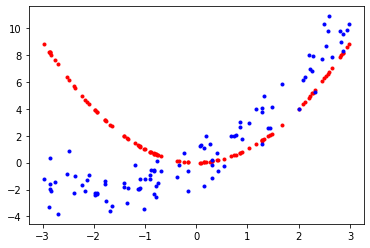

In [52]:
plt.plot(X_poly[:, 0], X_poly[:, 1], "r.")
plt.plot(X, y, "b.")

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.06587019]), array([[1.9909945 , 0.51698783]]))

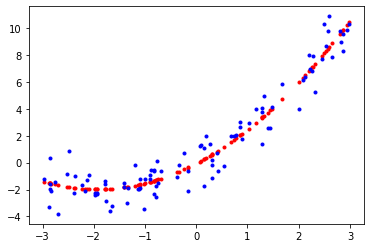

In [53]:
y_pred = lin_reg.predict(X_poly)
plt.plot(X, y_pred, "r.")
plt.plot(X, y, "b.")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    